### Imports

In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import matplotlib.pyplot as plt

from flow_flowers.config import Config
from flow_flowers.data import FlowersDataset, get_transform
from flow_flowers.utils import find_and_chdir, set_manual_seed

### Environment

In [72]:
find_and_chdir("config.yaml")
config = Config.init("config.yaml")

set_manual_seed(config.base.seed)
dataset = FlowersDataset(path=config.data.path)

### Preprocess and Augment

In [93]:
def plot_images(images, transform=None, title=""):
    _, axs = plt.subplots(1, len(images), figsize=(15, 2))
    for i, image in enumerate(images):
        if transform:
            image = transform(image=image)["image"]
        axs[i].imshow(image.permute((1, 2, 0)))
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

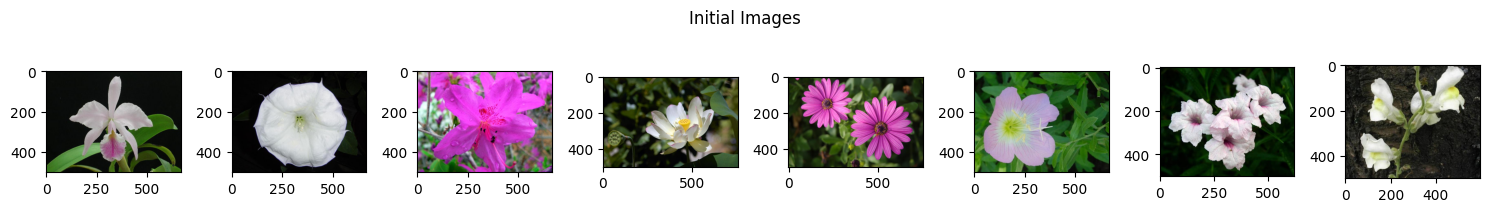

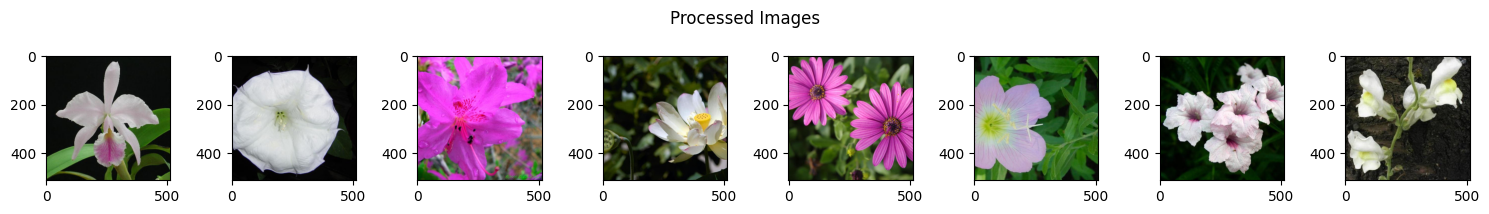

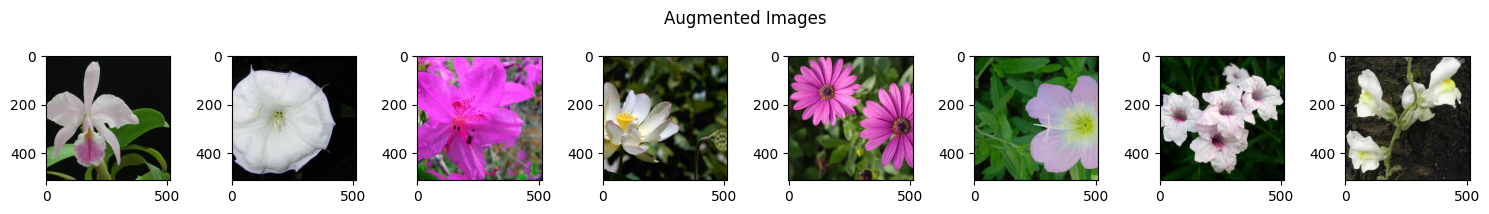

In [94]:
images = dataset.sample(8, "image")
t_process = get_transform(size=512, crop="random")
t_augment = get_transform(size=512, crop="random", augment=True)

plot_images(images, title="Initial Images")
plot_images(images, transform=t_process, title="Processed Images")
plot_images(images, transform=t_augment, title="Augmented Images")